# Confined Aquifer Test
**This test is taken from AQTESOLV examples.**

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ttim import *

Set basic parameters:

In [2]:
b = -5.4846 #aquifer thickness in m
Q = 1199.218 #constant discharge in m^3/d
r = 251.1552 #distance between observation well to test well in m
rw = 0.1524 #screen radius of test well in m

Load dataset:

In [3]:
data1 = np.loadtxt('data/gridley_well_1.txt')
t1 = data1[:, 0]
h1 = data1[:, 1]
data2 = np.loadtxt('data/gridley_well_3.txt')
t2 = data2[:, 0]
h2 = data2[:, 1]

Create conceptual model:

In [4]:
ml = ModelMaq(kaq=10, z=[0, b], Saq=0.001, tmin=0.001, tmax=1, topboundary='conf')
w = Well(ml, xw=0, yw=0, rw=rw, tsandQ=[(0, Q)], layers=0)
ml.solve()

self.neq  1
solution complete


Calibrate with two datasets simultaneously:

In [5]:
#unknown parameters: kaq, Saq
ca_0 = Calibrate(ml)
ca_0.set_parameter(name='kaq0', initial=10)
ca_0.set_parameter(name='Saq0', initial=1e-4)
ca_0.series(name='obs1', x=r, y=0, t=t1, h=h1, layer=0)
ca_0.fit(report=True)

..................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 31
    # data points      = 22
    # variables        = 2
    chi-square         = 0.01702153
    reduced chi-square = 8.5108e-04
    Akaike info crit   = -153.615012
    Bayesian info crit = -151.432927
[[Variables]]
    kaq0:  22.4340745 +/- 0.22268844 (0.99%) (init = 10)
    Saq0:  3.8208e-06 +/- 7.4239e-08 (1.94%) (init = 0.0001)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, Saq0) = -0.883


In [6]:
display(ca_0.parameters)
print('rmse:', ca_0.rmse())

,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,22.4341,2.226884e-01,0.992635,-inf,inf,10,[22.43407446037401]
Saq0,3.82077e-06,7.423947e-08,1.94305,-inf,inf,0.0001,[3.8207731812808345e-06]


rmse: 0.02781556960189975


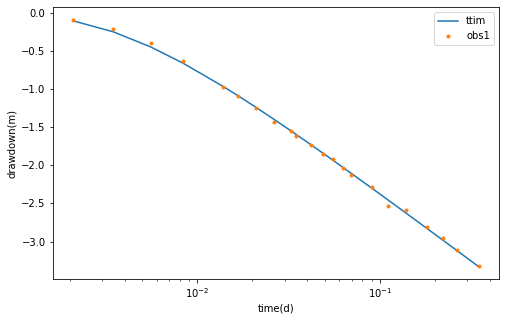

In [7]:
hm_0 = ml.head(r, 0, t1)
plt.figure(figsize = (8, 5))
plt.semilogx(t1, hm_0[0], label = 'ttim')
plt.semilogx(t1, h1, '.', label = 'obs1')
plt.xlabel('time(d)')
plt.ylabel('drawdown(m)')
plt.legend();

In [8]:
#unknown parameters: kaq, Saq
ca_1 = Calibrate(ml)
ca_1.set_parameter(name='kaq0', initial=10)
ca_1.set_parameter(name='Saq0', initial=1e-4)
ca_1.series(name='obs2', x=0, y=0, t=t2, h=h2, layer=0)
ca_1.fit(report=True)

..............................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 27
    # data points      = 14
    # variables        = 2
    chi-square         = 0.04383792
    reduced chi-square = 0.00365316
    Akaike info crit   = -76.7283879
    Bayesian info crit = -75.4502733
[[Variables]]
    kaq0:  27.9004460 +/- 0.73222849 (2.62%) (init = 10)
    Saq0:  1.7009e-04 +/- 5.8287e-05 (34.27%) (init = 0.0001)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, Saq0) = -0.997


In [9]:
display(ca_1.parameters)
print('rmse:', ca_1.rmse())

,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,27.9004,0.732228,2.62443,-inf,inf,10,[27.90044604680429]
Saq0,0.000170088,0.000058,34.2689,-inf,inf,0.0001,[0.00017008779752072242]


rmse: 0.05595784100028279


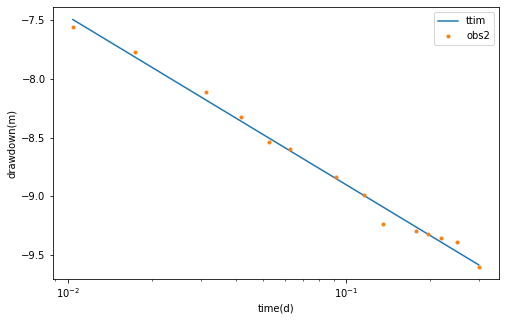

In [10]:
hm_1 = ml.head(0, 0, t2)
plt.figure(figsize = (8, 5))
plt.semilogx(t2, hm_1[0], label = 'ttim')
plt.semilogx(t2, h2, '.', label = 'obs2')
plt.xlabel('time(d)')
plt.ylabel('drawdown(m)')
plt.legend();

Calibrate with two datasets simultaneously:

In [11]:
ml_1 = ModelMaq(kaq=10, z=[0, b], Saq=0.001, tmin=0.001, tmax=1, topboundary='conf')
w_1 = Well(ml_1, xw=0, yw=0, rw=rw, tsandQ=[(0, Q)], layers=0)
ml_1.solve()

self.neq  1
solution complete


In [12]:
ca_2 = Calibrate(ml_1)
ca_2.set_parameter(name='kaq0', initial=10)
ca_2.set_parameter(name='Saq0', initial=1e-4, pmin=0)
ca_2.series(name='obs1', x=r, y=0, t=t1, h=h1, layer=0)
ca_2.series(name='obs2', x=0, y=0, t=t2, h=h2, layer=0)
ca_2.fit(report=True)

..........................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 23
    # data points      = 36
    # variables        = 2
    chi-square         = 2.65994309
    reduced chi-square = 0.07823362
    Akaike info crit   = -89.7877116
    Bayesian info crit = -86.6206737
[[Variables]]
    kaq0:  38.0492587 +/- 0.52461607 (1.38%) (init = 10)
    Saq0:  1.2468e-06 +/- 2.0176e-07 (16.18%) (init = 0.0001)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, Saq0) = -0.769


In [13]:
display(ca_2.parameters)
print('rmse:', ca_2.rmse())

,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,38.0493,5.246161e-01,1.37878,-inf,inf,10,[38.049258732018906]
Saq0,1.24679e-06,2.017582e-07,16.1823,0.0,inf,0.0001,[1.2467860428522215e-06]


rmse: 0.27182219922005885


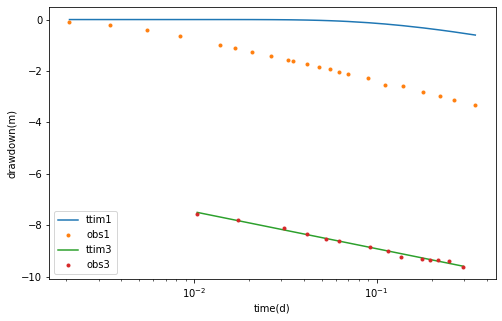

In [14]:
hm1_2 = ml.head(r, 0, t1)
hm2_2 = ml.head(0, 0, t2)
plt.figure(figsize = (8, 5))
plt.semilogx(t1, hm1_2[0], label = 'ttim1')
plt.semilogx(t1, h1, '.', label = 'obs1')
plt.semilogx(t2, hm2_2[0], label = 'ttim3')
plt.semilogx(t2, h2, '.', label = 'obs3')
plt.xlabel('time(d)')
plt.ylabel('drawdown(m)')
plt.legend();

Ty adding well skin resistance and wellbore storage:

In [15]:
ml_2 = ModelMaq(kaq=10, z=[0, b], Saq=0.001, tmin=0.001, tmax=1, topboundary='conf')
w_2 = Well(ml_2, xw=0, yw=0, rw=rw, rc=0.2, res=0.2, tsandQ=[(0, Q)], layers=0)
ml_2.solve()

self.neq  1
solution complete


If adding wellbore sotrage to the parameters to be optimized, the fit gives extremely large values of each parameter which is imposiible. However, when remove rc from well function, the fit cannot be completed with uncertainties. Thus, the rc value is determined as 0.2 by trial-and-error procedure.

In [16]:
ca_3 = Calibrate(ml_2)
ca_3.set_parameter(name = 'kaq0', initial = 10)
ca_3.set_parameter(name = 'Saq0', initial = 1e-4, pmin=0)
ca_3.set_parameter_by_reference(name='res', parameter=w_2.res, initial =0.2)
ca_3.series(name='obs1', x=r, y=0, t=t1, h=h1, layer=0)
ca_3.series(name='obs3', x=0, y=0, t=t2, h=h2, layer=0)
ca_3.fit(report=True)

..........................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 39
    # data points      = 36
    # variables        = 3
    chi-square         = 1.32970403
    reduced chi-square = 0.04029406
    Akaike info crit   = -112.748252
    Bayesian info crit = -107.997695
[[Variables]]
    kaq0:  38.4235138 +/- 0.39672514 (1.03%) (init = 10)
    Saq0:  8.9513e-07 +/- 1.1638e-07 (13.00%) (init = 0.0001)
    res:   0.12326394 +/- 0.02036696 (16.52%) (init = 0.2)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, Saq0) = -0.761
    C(Saq0, res)  = -0.246


In [17]:
display(ca_3.parameters)
print('rmse:', ca_3.rmse())

,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,38.4235,3.967251e-01,1.03251,-inf,inf,10,[38.423513816802576]
Saq0,8.95129e-07,1.163837e-07,13.0019,0.0,inf,0.0001,[8.951294596659665e-07]
res,0.123264,2.036696e-02,16.523,-inf,inf,0.2,[0.1232639435087151]


rmse: 0.19218798899587736


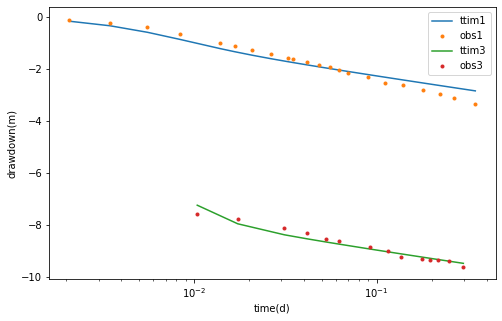

In [18]:
hw1 = ml_2.head(r, 0, t1)
hw2 = ml_2.head(0, 0, t2)
plt.figure(figsize = (8, 5))
plt.semilogx(t1, hw1[0], label = 'ttim1')
plt.semilogx(t1, h1, '.', label = 'obs1')
plt.semilogx(t2, hw2[0], label = 'ttim3')
plt.semilogx(t2, h2, '.', label = 'obs3')
plt.xlabel('time(d)')
plt.ylabel('drawdown(m)')
plt.legend();

## Summary of values simulated by AQTESOLV and MLU

The results simulated by different methods with two datasets simultaneously are presented below. In the example of AQTESOLV, result simulated with only observation well is presented. The comparision of results when only observation well is included can be found in the report related to this test.

In [19]:
t = pd.DataFrame(columns=['k [m/d]', 'Ss [1/m]', 'res'], \
                index=['MLU', 'AQTESOLV', 'ttim', 'ttim-res&rc'])
t.loc['MLU'] = [38.094, 1.193E-06, '-']
t.loc['AQTESOLV'] = [37.803, 1.356E-06, '-']
t.loc['ttim'] = np.append(ca_2.parameters['optimal'].values, '-')
t.loc['ttim-res&rc'] = ca_3.parameters['optimal'].values 
t['rc'] = ['-', '-', '-', 0.2]
t['RMSE'] = [0.259, 0.270, 0.272, 0.192]
t

,k [m/d],Ss [1/m],res,rc,RMSE
MLU,38.094,1.193e-06,-,-,0.259
AQTESOLV,37.803,1.356e-06,-,-,0.270
ttim,38.0493,1.24679e-06,-,-,0.272
ttim-res&rc,38.4235,8.95129e-07,0.123264,0.2,0.192
